<a href="https://colab.research.google.com/github/PintoPaola/Inteligencia-Artificial/blob/main/parcial122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
import pandas as pd

# Suponiendo que tienes acceso a la ubicación del archivo CSV
file_path = '/content/drive/MyDrive/IA/DATASET/heart_2020-cleaned.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path, delimiter=',')

# Convertir "Sí" a 1 y "No" a 0 en todo el DataFrame si es necesario
# Por ejemplo:
# df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, y_train = df.iloc[:16000, 1:18], df.iloc[:16000, 0]
X_test, y_test = df.iloc[16000:, 1:18], df.iloc[16000:, 0]
X = X_train
y = y_train

# Visualizar los conjuntos de entrenamiento
print("Conjunto de entrenamiento (X_train):")
print(X_train.head())
print("\nEtiquetas de entrenamiento (y_train):")
print(y_train.head())

# Visualizar los conjuntos de prueba
print("\nConjunto de prueba (X_test):")
print(X_test.head())
print("\nEtiquetas de prueba (y_test):")
print(y_test.head())



Conjunto de entrenamiento (X_train):
     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  16.60        1                0       0               3            30   
1  20.34        0                0       1               0             0   
2  26.58        1                0       0              20            30   
3  24.21        0                0       0               0             0   
4  23.71        0                0       0              28             0   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0            0    1            8     1         1                 1          2   
1            0    1           13     1         0                 1          2   
2            0    2           10     1         1                 1          4   
3            0    1           12     1         0                 0          3   
4            1    1            5     1         0                 1          2   

   SleepTime  Asthm

Sigmoide
Sirve para mapear las entradas a probabilidades en el rango de 0 a 1

In [ ]:
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


Normaliza las características de entrada de una matriz

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X= np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
# Descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.72889013e+00 -8.02825325e-04  7.56535523e-02 -2.02547912e-02
  1.75933912e-01  9.13437774e-02 -4.91641293e-03  9.75304059e-02
  1.34064437e-01  2.42952701e-01 -4.08121389e-02  1.05864093e-01
 -4.72453159e-02  1.90298908e-01  1.26837937e-02  2.23705107e-02
  8.41794174e-02  7.16439856e-02]


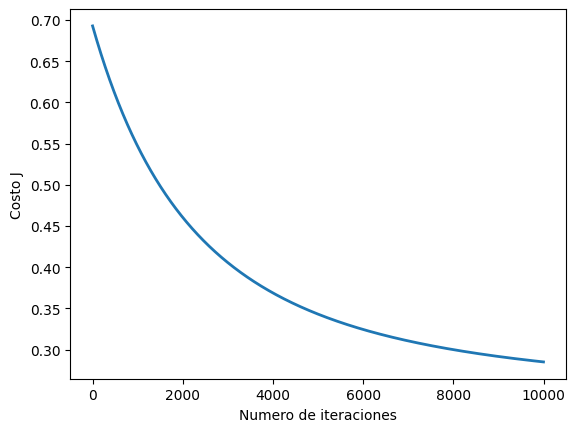

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(18)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
print(X_test)
print(theta)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
16000   26.66        1                0       1               0             0   
16001   26.63        1                0       0               0             0   
16002   41.25        1                0       0               0             0   
16003   39.87        0                0       0               0             5   
16004   26.63        0                0       0               0             0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0               7             0   
319791  29.84        1                0       0               0             0   
319792  24.24        0                0       0               0             0   
319793  32.81        0                0       0               0             0   
319794  46.56        0                0       0               0             0   

        DiffWalking  Sex  A

In [ ]:
X_test, y_test = df.iloc[16000:, 1:18], df.iloc[16000:, 0]
print(X_test)


          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
16000   26.66        1                0       1               0             0   
16001   26.63        1                0       0               0             0   
16002   41.25        1                0       0               0             0   
16003   39.87        0                0       0               0             5   
16004   26.63        0                0       0               0             0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0               7             0   
319791  29.84        1                0       0               0             0   
319792  24.24        0                0       0               0             0   
319793  32.81        0                0       0               0             0   
319794  46.56        0                0       0               0             0   

        DiffWalking  Sex  A

In [ ]:

# Normalizar los datos de prueba X_test
X_test_norm, mu, sigma = featureNormalize(X_test)

# Agregar una columna de unos correspondiente al término de intercepción
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

aprueba = sigmoid(X_test_norm.dot(theta))

# Imprimir la salida del modelo
print(aprueba)

[0.46166108 0.43898867 0.17399908 ... 0.0975956  0.088563   0.15027808]


In [ ]:
print(X_test_norm)
print("THETAS")
print(theta)
print("PREDICt")
predict =sigmoid(X_test_norm.dot(theta))
print(predict)


[[ 1.         -0.26139538  1.19659457 ... -0.39262324 -0.19466656
   3.14011048]
 [ 1.         -0.2661174   1.19659457 ... -0.39262324  5.13698924
  -0.31846013]
 [ 1.          2.03508187  1.19659457 ... -0.39262324 -0.19466656
  -0.31846013]
 ...
 [ 1.         -0.64230525 -0.83570495 ... -0.39262324 -0.19466656
  -0.31846013]
 [ 1.          0.70661936 -0.83570495 ... -0.39262324 -0.19466656
  -0.31846013]
 [ 1.          2.87087997 -0.83570495 ... -0.39262324 -0.19466656
  -0.31846013]]
THETAS
[-1.72889013e+00 -8.02825325e-04  7.56535523e-02 -2.02547912e-02
  1.75933912e-01  9.13437774e-02 -4.91641293e-03  9.75304059e-02
  1.34064437e-01  2.42952701e-01 -4.08121389e-02  1.05864093e-01
 -4.72453159e-02  1.90298908e-01  1.26837937e-02  2.23705107e-02
  8.41794174e-02  7.16439856e-02]
PREDICt
[0.46166108 0.43898867 0.17399908 ... 0.0975956  0.088563   0.15027808]
